# 데이터 타입별 시각화
1. 수치형 X 수치형
    * scatterplot, lmplot, jointplot
2. 수치형 X 카테고리형
    * boxplot, violin plot, barplot, heatmap
3. 수치형 X 위치정보
    * folium 라이브러리 활용

In [1]:
import seaborn as sns

In [2]:
# 예제 데이터셋(seaborn에 존재) - tips데이터셋

raw = sns.load_dataset('tips')
raw

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [3]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


#### 수치형 데이터 분포 살펴보기
* sns.distplot(df['칼럼명'])

In [4]:
raw['total_bill']

0      16.99
1      10.34
2      21.01
3      23.68
4      24.59
       ...  
239    29.03
240    27.18
241    22.67
242    17.82
243    18.78
Name: total_bill, Length: 244, dtype: float64

C:\Users\psuny\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


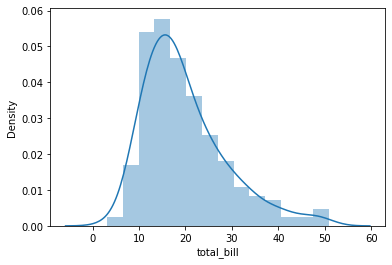

In [9]:
sns.distplot(raw['total_bill'])     # sns.distplot()을 이용해 수치형 데이터의 분포를 히스토그램을 통해 볼 수 있음

#### 수치형 X 수치형 데이터 분포 살펴보기
* relplot(data = df, x = , y = , hue = , kind = 'scatter')
    * kind옵션 = scatter(기본값), line

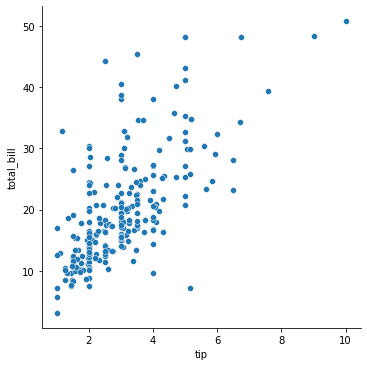

In [10]:
sns.relplot(data = raw, x = 'tip', y = 'total_bill')     # kind옵션 미지정시 scatter이 기본값

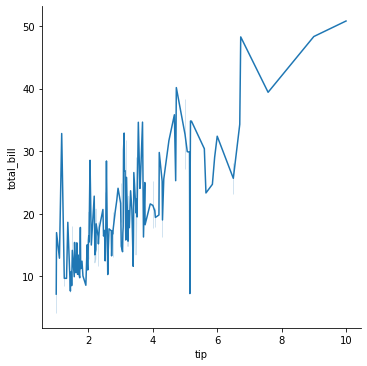

In [11]:
sns.relplot(data = raw, x = 'tip', y = 'total_bill', kind = 'line')

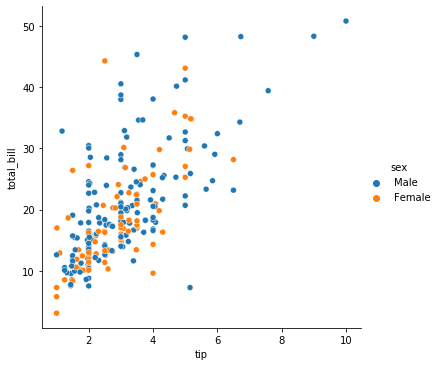

In [12]:
# 성별에 따라 색상 구분 hue 옵션 사용

sns.relplot(data = raw, x = 'tip', y = 'total_bill', hue = 'sex')

#### 수치형 X 수치형 관계 살펴보기
* jointplot(data = df, x = , y = , kind = 'scatter')
    * kind에 따라 그래프 형태 변화
        - scatter: (기본값) point
        - reg: point + regression
        - kde: 누적 분포 차트 like 지도

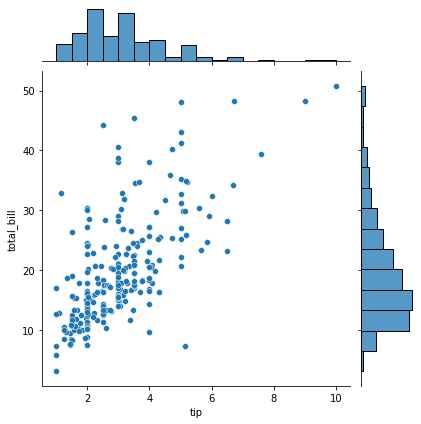

In [13]:
# jointplot을 이용해 두 수치데이터 간의 관계와 각 데이터의 분포를 확인 할 수 있음

sns.jointplot(data = raw, x = 'tip', y = 'total_bill')     # kind값 미지정시 기본값은 scatter

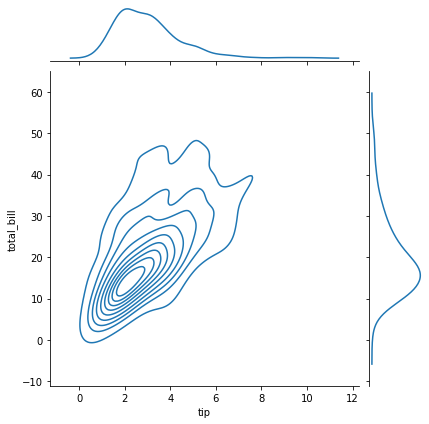

In [16]:
# kind = 'kde'로 지정할 경우 밀도함수를 이용해 시각화
# 진하게 표시될수록 집중되어 있음을 의미, 값이 급격하게 변할수록 선의 간격이 좁게 표시

sns.jointplot(data = raw, x = 'tip', y = 'total_bill', kind = 'kde')

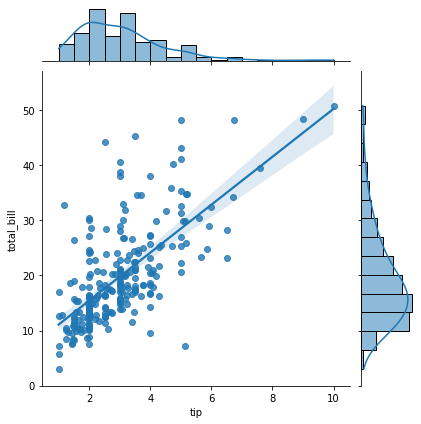

In [18]:
# kind = 'reg'로 할 경우, 회귀선 확인 가능

sns.jointplot(data = raw, x = 'tip', y = 'total_bill', kind = 'reg')

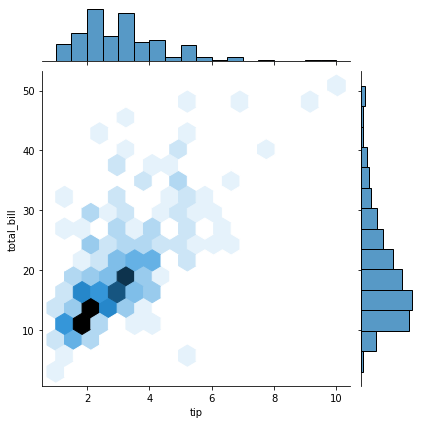

In [19]:
# kind = 'hex'는 kde 속성과 유사하게 밀도를 표현하나 kde처럼 간격이 다르지 않고, 간격이 모두 동일한 육각형 모향으로 시각화

sns.jointplot(data = raw, x = 'tip', y = 'total_bill', kind = 'hex')